In [201]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

In [202]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [203]:
df = pd.read_csv(r"C:\Users\rishi\Desktop\Programming\loan_data_set.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [204]:
df.shape

(614, 13)

In [205]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [206]:
#Exploratory Data Analysis

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

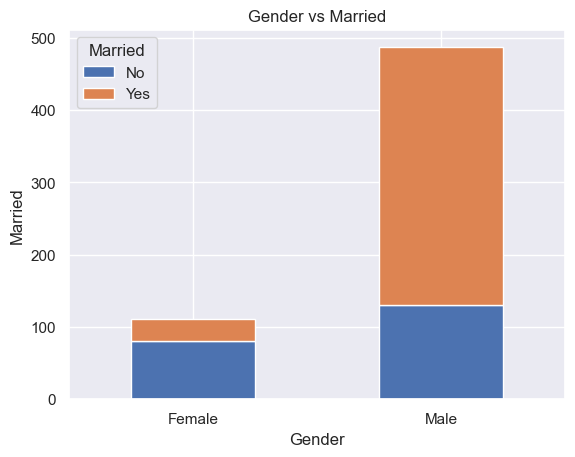

In [207]:
pd.crosstab(df.Gender,df.Married).plot(kind='bar',stacked=True)
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Married')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

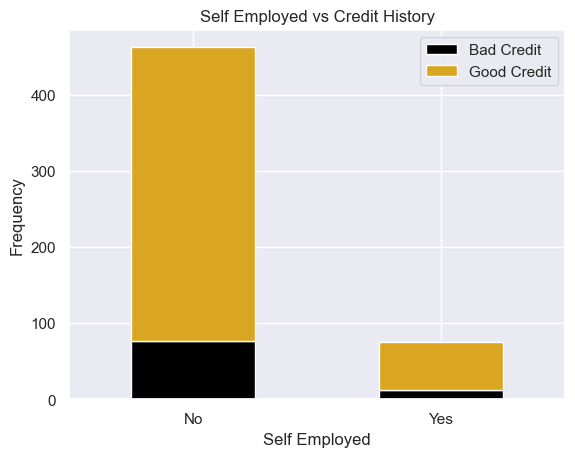

In [208]:
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind='bar',stacked=True, color=['black','goldenrod'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)

<AxesSubplot:xlabel='Education', ylabel='count'>

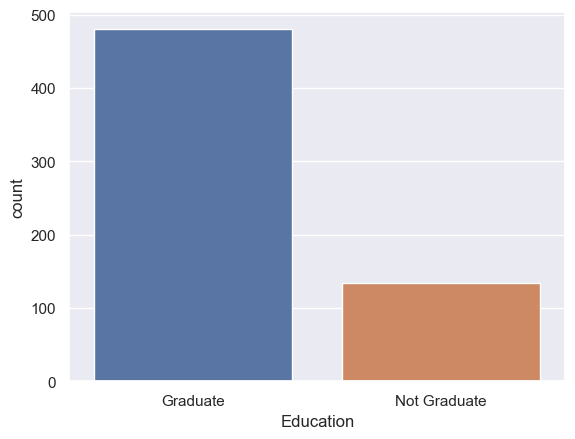

In [209]:
sns.countplot(x='Education', data=df)

(array([0, 1, 2]),
 [Text(0, 0, 'Rural'), Text(1, 0, 'Semiurban'), Text(2, 0, 'Urban')])

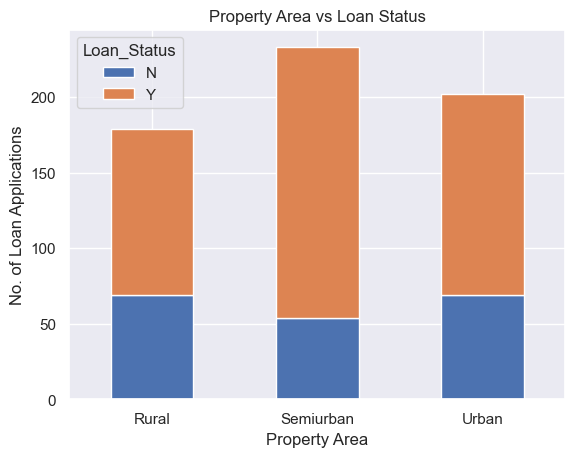

In [210]:
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind='bar',stacked=True)
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('No. of Loan Applications')
plt.xticks(rotation=0)

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

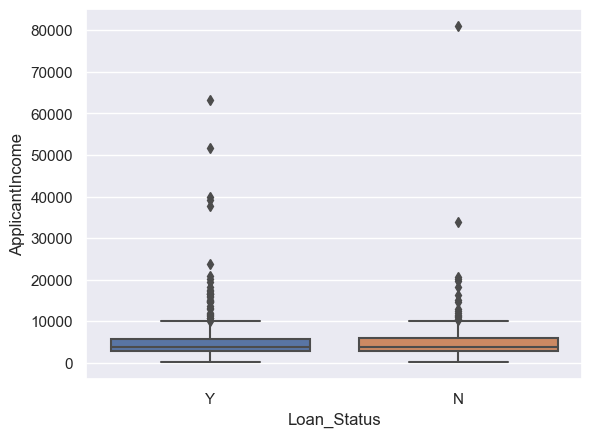

In [211]:
sns.boxplot(x='Loan_Status',y='ApplicantIncome', data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

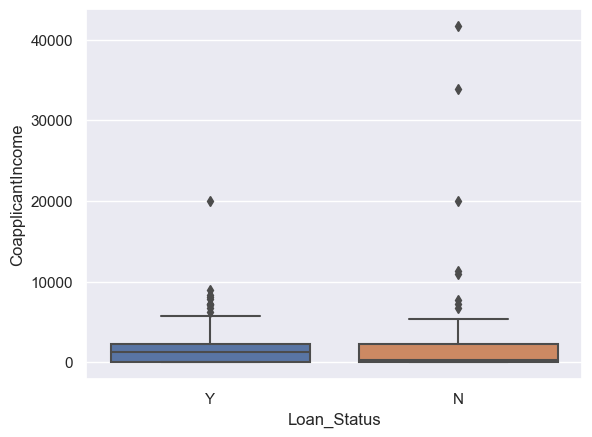

In [212]:
sns.boxplot(x='Loan_Status',y='CoapplicantIncome',data=df)

In [213]:
#There are outliers present in the income categories of persons. The data is positively skewed, so there are persons with very high income.

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

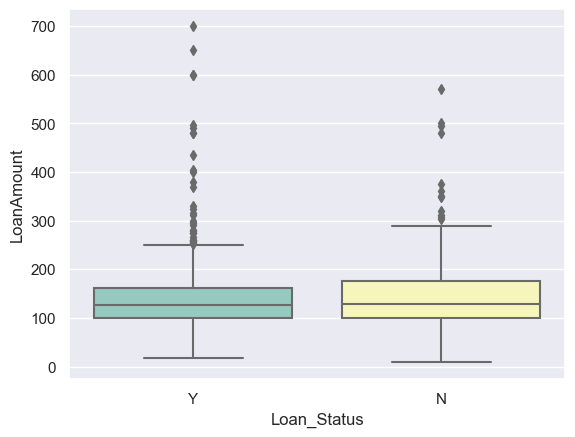

In [214]:
sns.boxplot(x='Loan_Status',y='LoanAmount',data=df, palette='Set3')

<AxesSubplot:>

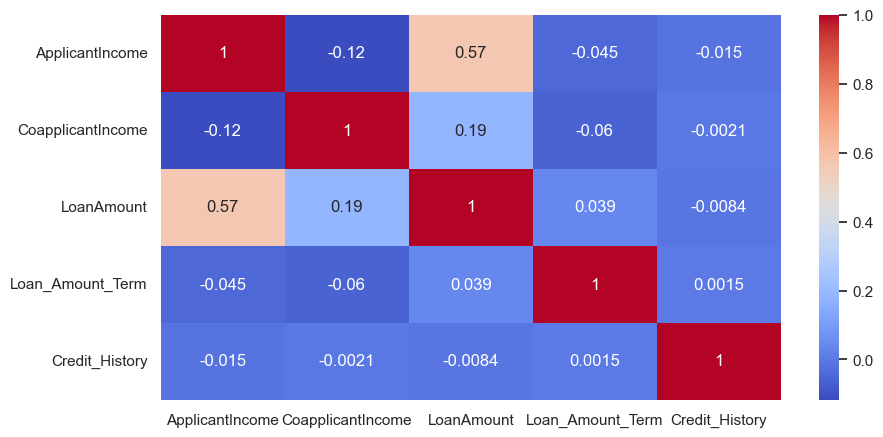

In [215]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [216]:
df.Loan_Amount_Term.value_counts(dropna=False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

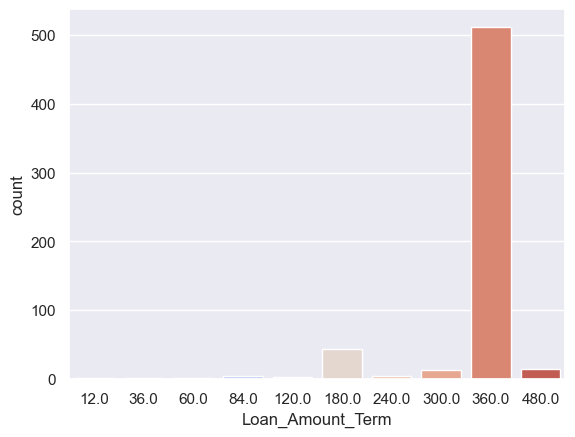

In [217]:
sns.countplot(x='Loan_Amount_Term',data=df, palette= 'coolwarm')

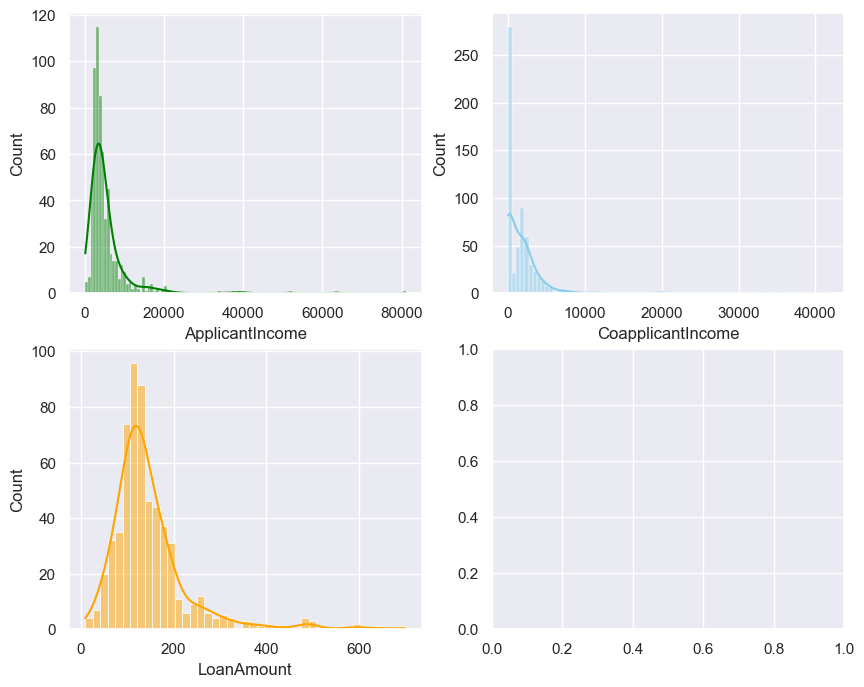

In [218]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');



In [219]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [220]:
df = df.drop(['Loan_ID'],axis=1)

In [221]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [222]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [223]:
df['LoanAmount'].mean()

146.41216216216216

In [224]:
df['LoanAmount'].median()

128.0

In [225]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

In [226]:
df['LoanAmount'].isnull().sum()

0

In [227]:
df = pd.get_dummies(df)

df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
df.rename(columns=new, inplace=True)

In [228]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,128.0,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,0,1,0,0,1,0,1,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,0,1,1,0,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1


In [229]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

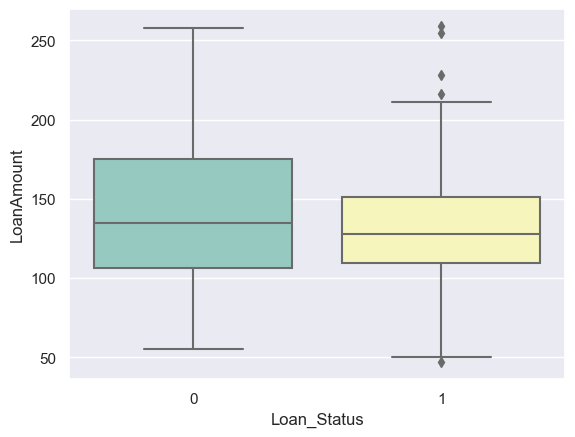

In [230]:
sns.boxplot(x='Loan_Status',y='LoanAmount',data=df, palette='Set3')

In [231]:
#Treating datasets
df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

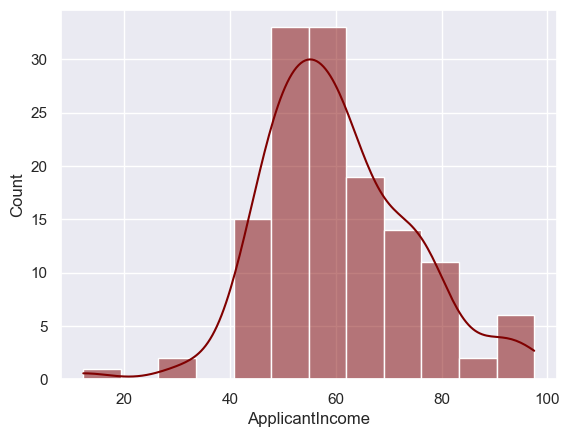

In [232]:
sns.histplot(data=df, x='ApplicantIncome', kde=True, color='maroon',)

In [233]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

In [234]:
X, y = SMOTE().fit_resample(X,y)

In [235]:
X = MinMaxScaler().fit_transform(X)

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 40)

In [287]:
KNeighborsAccuracy = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    KNeighborsAccuracy.append(KNclassifier.score(X_test, y_test))
    

KN_Best_Acc=max(KNeighborsAccuracy)
print("KNN Best Accuracy : {:.2f}%".format(KN_Best_Acc*100))

KNN Best Accuracy : 83.93%


C:\Users\rishi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\rishi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Text(0, 0.5, 'Score')

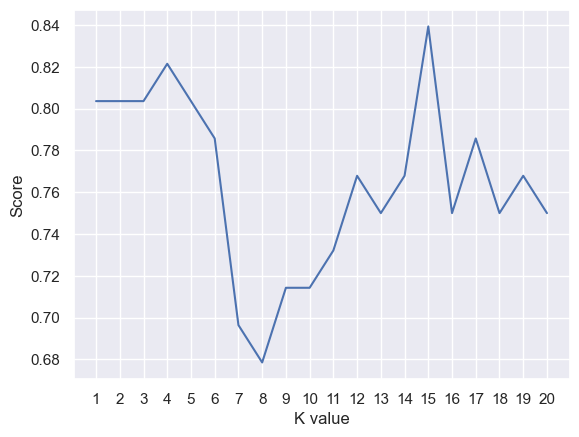

In [288]:
plt.plot(range(1,21), KNeighborsAccuracy)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")

In [289]:
y_pred= KNclassifier.predict(X_test)
recall_score(y_pred,y_test)

C:\Users\rishi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.68

In [290]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)
#Used saga since dataset is large.

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LR_Accuracy = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LR_Accuracy*100))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        33
           1       0.69      0.78      0.73        23

    accuracy                           0.77        56
   macro avg       0.76      0.77      0.76        56
weighted avg       0.78      0.77      0.77        56

[[25  8]
 [ 5 18]]
LR accuracy: 76.79%


In [291]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred1 = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

from sklearn.metrics import accuracy_score
SVC_Accuracy = accuracy_score(y_pred1,y_test)
print('SVC accuracy: {:.2f}%'.format(SVC_Accuracy*100))

              precision    recall  f1-score   support

           0       0.93      0.76      0.83        33
           1       0.72      0.91      0.81        23

    accuracy                           0.82        56
   macro avg       0.83      0.84      0.82        56
weighted avg       0.84      0.82      0.82        56

[[25  8]
 [ 2 21]]
SVC accuracy: 82.14%


In [292]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
DT_Accuracy = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DT_Accuracy*100))

Decision Tree Accuracy: 83.93%


Text(0, 0.5, 'Score')

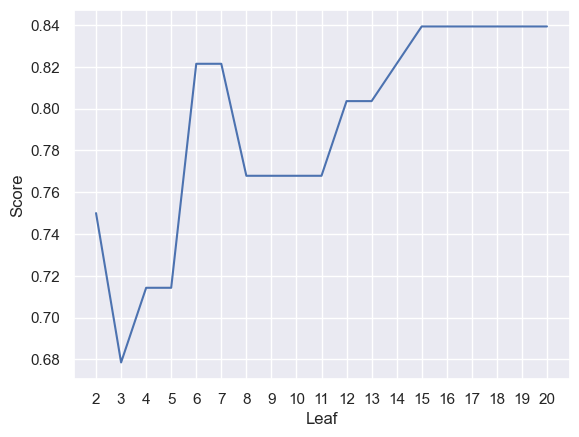

In [293]:
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")

In [294]:
y_pred= DTclassifier.predict(X_test)
recall_score(y_pred,y_test)

0.75

In [295]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))

RF_Accuracy = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RF_Accuracy*100))

Random Forest Accuracy:  82.14%


Text(0, 0.5, 'Score')

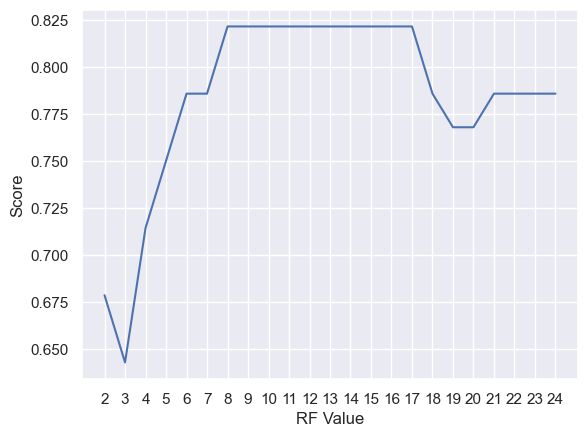

In [296]:
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")

In [297]:
y_pred= RFclassifier.predict(X_test)
recall_score(y_pred,y_test)

0.7037037037037037

In [298]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 
                                  'SVM','Decision Tree', 
                                  'Random Forest'], 
                        'Accuracy': [LR_Accuracy*100, KN_Best_Acc*100, SVC_Accuracy*100, 
                                      DT_Accuracy*100,RF_Accuracy*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,K Neighbors,83.928571
3,Decision Tree,83.928571
2,SVM,82.142857
4,Random Forest,82.142857
0,Logistic Regression,76.785714


In [134]:
#Therefore SVM gives best classification prediction. 